# Project 1
Alex
Claire
Steve
Sylvia

This project explores data analysis of cryptocurrencies.

In [1]:
import os
from dotenv import load_dotenv
from pathlib import Path
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd

## Import data

In [2]:
filepath=Path("Resources/BTC_c_.csv")

BTC_data = pd.read_csv(filepath, index_col="Date", parse_dates=True)
print(BTC_data.dtypes)


#BTC_data['Date'] = pd.to_datetime(BTC_data['Date'])

#print(BTC_data.dtypes)
BTC_data

BTCUSD    float64
dtype: object


,BTCUSD
Date,
2015-11-19,326.41
2015-11-20,322.39
2015-11-21,327.00
2015-11-22,323.71
2015-11-23,323.00
...,...
2021-09-26,43228.50
2021-09-27,42171.70
2021-09-28,41049.00


In [3]:


filepath=Path("Resources/ETH_c_.csv")
ETH_data = pd.read_csv(filepath, index_col="Date", parse_dates=True)
#ETH_data['Date'] = pd.to_datetime(ETH_data['Date'], 
print(ETH_data.dtypes)
ETH_data

ETHUSD    float64
dtype: object


,ETHUSD
Date,
2016-10-14,11.92
2016-10-15,11.95
2016-10-16,11.95
2016-10-17,11.96
2016-10-18,12.54
...,...
2021-09-26,3064.64
2021-09-27,2927.15
2021-09-28,2807.19


In [4]:
merged_BTCETH = pd.merge(BTC_data, ETH_data, on=["Date"])


In [5]:
merged_BTCETH.head


<bound method NDFrame.head of               BTCUSD   ETHUSD
Date                         
2016-10-14    638.03    11.92
2016-10-15    638.16    11.95
2016-10-16    641.92    11.95
2016-10-17    639.56    11.96
2016-10-18    635.11    12.54
...              ...      ...
2021-09-26  43228.50  3064.64
2021-09-27  42171.70  2927.15
2021-09-28  41049.00  2807.19
2021-09-29  41522.10  2848.28
2021-09-30  43824.40  3000.45

[1813 rows x 2 columns]>

In [6]:
merged_BTCETH.dtypes

BTCUSD    float64
ETHUSD    float64
dtype: object

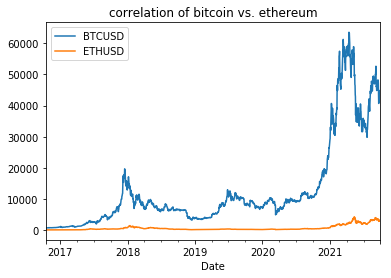

In [7]:
# Plot the data trends of the bitcoin vs. ethereum over these years
merged_BTCETH.plot(title='correlation of bitcoin vs. ethereum')

 ### Scaling Prices

In [8]:
merged_BTCETH["BTC_norm"]=merged_BTCETH["BTCUSD"] / merged_BTCETH["BTCUSD"].abs().max()

In [9]:
merged_BTCETH

,BTCUSD,ETHUSD,BTC_norm
Date,,,
2016-10-14,638.03,11.92,0.010034
2016-10-15,638.16,11.95,0.010036
2016-10-16,641.92,11.95,0.010095
2016-10-17,639.56,11.96,0.010058
2016-10-18,635.11,12.54,0.009988
...,...,...,...
2021-09-26,43228.50,3064.64,0.679820
2021-09-27,42171.70,2927.15,0.663200
2021-09-28,41049.00,2807.19,0.645544


In [10]:
merged_BTCETH["ETH_norm"]=merged_BTCETH["ETHUSD"] / merged_BTCETH["ETHUSD"].abs().max()

In [11]:
merged_BTCETH

,BTCUSD,ETHUSD,BTC_norm,ETH_norm
Date,,,,
2016-10-14,638.03,11.92,0.010034,0.002852
2016-10-15,638.16,11.95,0.010036,0.002859
2016-10-16,641.92,11.95,0.010095,0.002859
2016-10-17,639.56,11.96,0.010058,0.002861
2016-10-18,635.11,12.54,0.009988,0.003000
...,...,...,...,...
2021-09-26,43228.50,3064.64,0.679820,0.733201
2021-09-27,42171.70,2927.15,0.663200,0.700307
2021-09-28,41049.00,2807.19,0.645544,0.671607


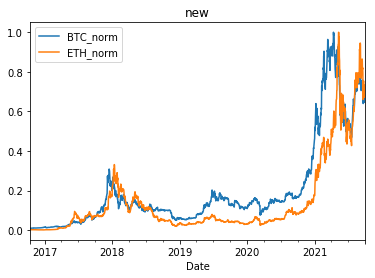

In [12]:
merged_BTCETH[['BTC_norm', 'ETH_norm']].plot(title='new')

### Returns data for better understanding

In [13]:
btceth_returns = merged_BTCETH.pct_change()
btceth_returns.head()

,BTCUSD,ETHUSD,BTC_norm,ETH_norm
Date,,,,
2016-10-14,NaN,NaN,NaN,NaN
2016-10-15,0.000204,0.002517,0.000204,0.002517
2016-10-16,0.005892,0.000000,0.005892,0.000000
2016-10-17,-0.003676,0.000837,-0.003676,0.000837
2016-10-18,-0.006958,0.048495,-0.006958,0.048495


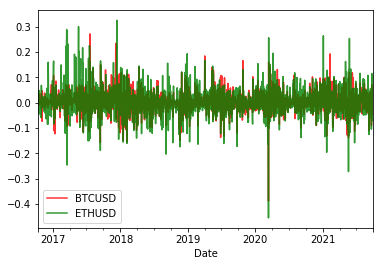

In [69]:
# Plot the daily returns of Bitcoin and Ethernet
btceth_returns[["BTCUSD","ETHUSD"]].plot(alpha=0.8, color=["r","g"]) 

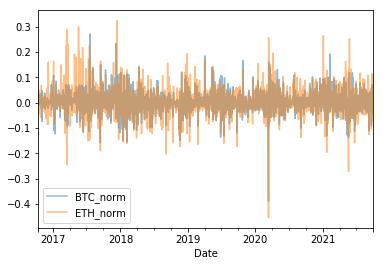

In [65]:
btceth_returns[["BTC_norm","ETH_norm"]].plot(alpha=0.5)

### Correlations

In [15]:
correlation = btceth_returns.corr()
correlation

,BTCUSD,ETHUSD,BTC_norm,ETH_norm
BTCUSD,1.000000,0.667167,1.000000,0.667167
ETHUSD,0.667167,1.000000,0.667167,1.000000
BTC_norm,1.000000,0.667167,1.000000,0.667167
ETH_norm,0.667167,1.000000,0.667167,1.000000


### Create Bins for perspective

In [16]:
# Create the variable bins to define our bounds for when we cut the dataframe.
bins = [0, 10000, 35000, 50000, 70000]

# Create names for the bins
group_names = ["Low", "Moderate", "Above Average", "High"]

### Label Price Ranges According to the Corresponding Bin¶


In [17]:
# Add a column named "Salary Level" to people_df and slice the data into the bins
merged_BTCETH["BTC_Price_Range"] = pd.cut(merged_BTCETH["BTCUSD"], bins, labels=group_names)

merged_BTCETH.head()

,BTCUSD,ETHUSD,BTC_norm,ETH_norm,BTC_Price_Range
Date,,,,,
2016-10-14,638.03,11.92,0.010034,0.002852,Low
2016-10-15,638.16,11.95,0.010036,0.002859,Low
2016-10-16,641.92,11.95,0.010095,0.002859,Low
2016-10-17,639.56,11.96,0.010058,0.002861,Low
2016-10-18,635.11,12.54,0.009988,0.003000,Low


### Create Parallel Plot

In [18]:
#import calendar
# merged_BTCETH['Year'] = merged_BTCETH["Date"].dt.year


In [25]:
merged_BTCETH_new=merged_BTCETH.reset_index()
merged_BTCETH_new.head()

,Date,BTCUSD,ETHUSD,BTC_norm,ETH_norm,BTC_Price_Range
0,2016-10-14,638.03,11.92,0.010034,0.002852,Low
1,2016-10-15,638.16,11.95,0.010036,0.002859,Low
2,2016-10-16,641.92,11.95,0.010095,0.002859,Low
3,2016-10-17,639.56,11.96,0.010058,0.002861,Low
4,2016-10-18,635.11,12.54,0.009988,0.003000,Low


In [47]:
merged_BTCETH_new['Date'].dt.year
merged_BTCETH_new["Year"] = merged_BTCETH_new['Date'].dt.year
merged_BTCETH_year_mean= merged_BTCETH_new.groupby('Year')[["BTCUSD","ETHUSD","BTC_norm","ETH_norm"]].mean()
merged_BTCETH_year_mean =merged_BTCETH_year_mean.reset_index()
merged_BTCETH_new

,Date,BTCUSD,ETHUSD,BTC_norm,ETH_norm,BTC_Price_Range,Year
0,2016-10-14,638.03,11.92,0.010034,0.002852,Low,2016
1,2016-10-15,638.16,11.95,0.010036,0.002859,Low,2016
2,2016-10-16,641.92,11.95,0.010095,0.002859,Low,2016
3,2016-10-17,639.56,11.96,0.010058,0.002861,Low,2016
4,2016-10-18,635.11,12.54,0.009988,0.003000,Low,2016
...,...,...,...,...,...,...,...
1808,2021-09-26,43228.50,3064.64,0.679820,0.733201,Above Average,2021
1809,2021-09-27,42171.70,2927.15,0.663200,0.700307,Above Average,2021
1810,2021-09-28,41049.00,2807.19,0.645544,0.671607,Above Average,2021
1811,2021-09-29,41522.10,2848.28,0.652984,0.681438,Above Average,2021


In [21]:
#import calendar
# merged_BTCETH = merged_BTCETH["Date"].dt.year

#combined_final = merged_BTCETH
#combined_final = combined_final.set_index('Date')
#annual = combined_final.resample("A").mean()
#annual


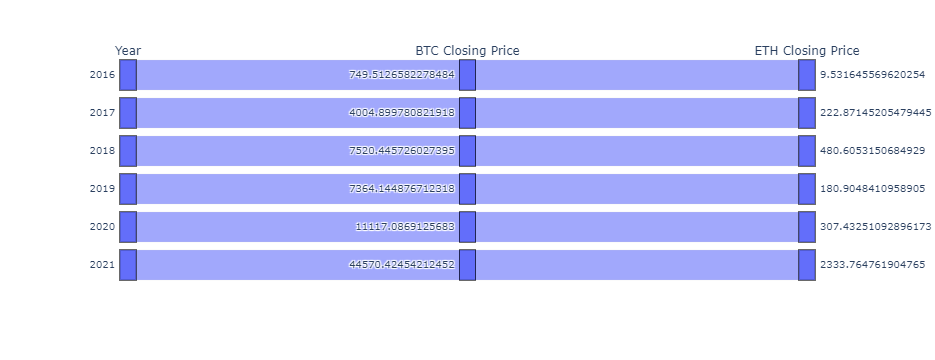

In [32]:
# Plot data using parallel_categories
px.parallel_categories(
    merged_BTCETH_year_mean,
    dimensions=["Year", "BTCUSD", "ETHUSD"],
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "Year" : "Year",
        "BTCUSD": "BTC Closing Price",
        "ETHUSD": "ETH Closing Price",
    }
)



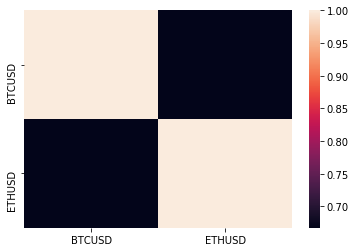

In [38]:
merged_returns = merged_BTCETH[["BTCUSD","ETHUSD"]].pct_change()
merged_returns
correlation = merged_returns.corr()
correlation
sns.heatmap(correlation)

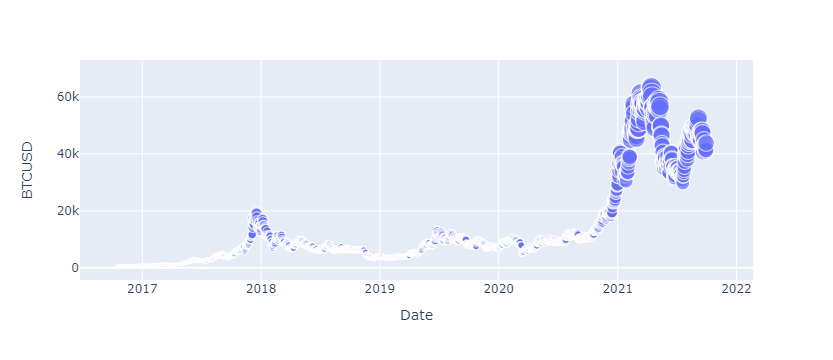

In [40]:
# Create scatter plot
px.scatter(merged_BTCETH_new, x="Date", y="BTCUSD", size="BTCUSD")

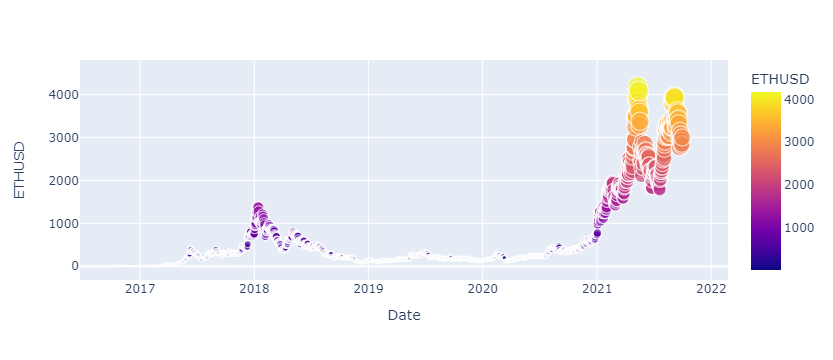

In [45]:
# Create scatter plot
px.scatter(merged_BTCETH_new, x="Date", y="ETHUSD", size="ETHUSD", color='ETHUSD')

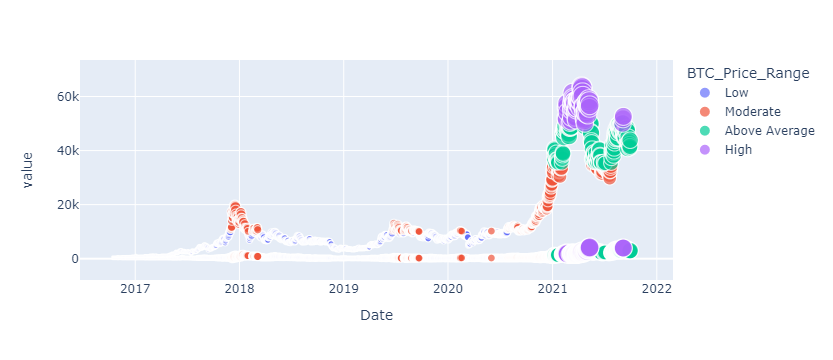

In [48]:
# Create scatter plot comparing average sale price and cost of living index
px.scatter(
    merged_BTCETH_new,  # feed it the df
    x="Date",  # x, identify the desired columns
    y=["BTCUSD","ETHUSD"],  # y
    size="BTC_norm",  # z
    color="BTC_Price_Range",  # z2 - many dimensions!
)


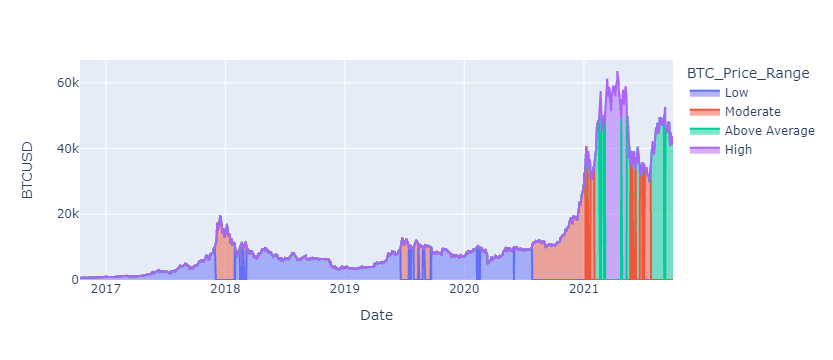

In [55]:
# Create area plot
px.area(
    merged_BTCETH_new,
    x="Date",
    y="BTCUSD",
    color="BTC_Price_Range",
    line_group="BTC_Price_Range",
)

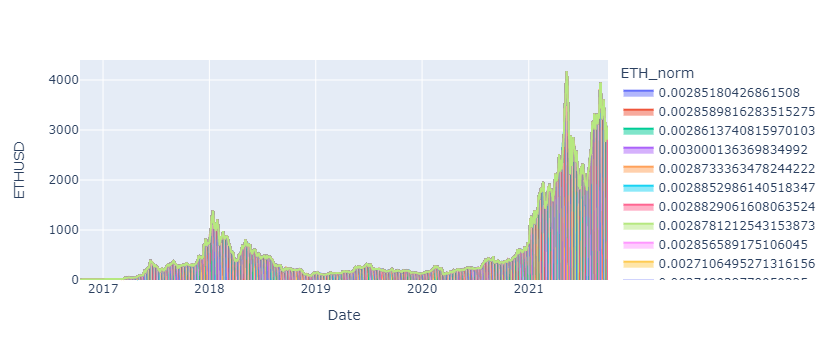

In [57]:
# Create area plot
px.area(
    merged_BTCETH_new,
    x="Date",
    y="ETHUSD",
    color="ETH_norm",
    line_group="ETHUSD",
)